In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2010-01-01'
end = '2022-04-14'

In [3]:
data = yf.download('AAPL',start,end)
data.reset_index(inplace=True) 

[*********************100%***********************]  1 of 1 completed


In [4]:
x = data.iloc[:,1:4].values
x

array([[  7.61178589,   7.61964321,   7.51999998],
       [  7.62249994,   7.66071415,   7.58500004],
       [  7.66428614,   7.69964314,   7.61607122],
       ...,
       [168.71000671, 169.02999878, 165.5       ],
       [168.02000427, 169.86999512, 166.63999939],
       [167.38999939, 171.03999329, 166.77000427]])

In [5]:
y = data.iloc[:,4].values
y

array([  7.52607107,   7.64321423,   7.65642881, ..., 165.75      ,
       167.66000366, 170.3999939 ])

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [7]:
x_train

array([[ 37.88499832,  38.06750107,  37.63999939],
       [ 12.46857071,  12.491786  ,  12.31785679],
       [ 13.37749958,  13.63571358,  12.65142918],
       ...,
       [ 26.06749916,  26.08749962,  25.6875    ],
       [ 79.45749664,  79.92250061,  77.72750092],
       [118.31999969, 119.19999695, 116.12999725]])

In [8]:
x_train.shape

(2319, 3)

In [9]:
x_test.shape

(774, 3)

In [10]:
y_train.shape

(2319,)

In [11]:
y_train

array([ 37.97249985,  12.38107109,  13.30357075, ...,  25.73749924,
        77.85250092, 118.69000244])

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
x_train

array([[-0.18548473, -0.19023962, -0.18202177],
       [-0.78990266, -0.79127939, -0.79126047],
       [-0.76828779, -0.76439663, -0.78323488],
       ...,
       [-0.46651197, -0.47177456, -0.46959322],
       [ 0.80313427,  0.79337001,  0.78246444],
       [ 1.72730795,  1.71640726,  1.70641022]])

In [14]:
x_test

array([[-0.05029198, -0.05581733, -0.04770947],
       [-0.53444803, -0.53823871, -0.53384931],
       [ 0.54023971,  0.54784943,  0.54962845],
       ...,
       [ 2.18556005,  2.15774492,  1.96793732],
       [-0.7190874 , -0.71794974, -0.71921078],
       [-0.34891686, -0.34222853, -0.341777  ]])

In [15]:
from sklearn.svm import SVR
regression = SVR(kernel='linear')
regression.fit(x_train, y_train)

SVR(kernel='linear')

In [16]:
y_pred = regression.predict(x_test)

In [17]:
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)

array([[ 43.52759312,  43.74250031],
       [ 23.16038748,  23.05607033],
       [ 68.70652303,  69.02500153],
       ...,
       [133.34655561, 131.3999939 ],
       [ 15.46653298,  15.56999969],
       [ 31.25613667,  31.59250069]])

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

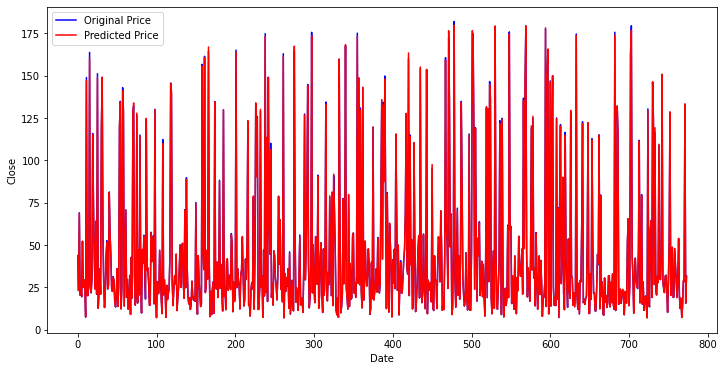

In [19]:
fig2 =plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

In [20]:
x_dt = data.iloc[:,1:4].values
x_dt

array([[  7.61178589,   7.61964321,   7.51999998],
       [  7.62249994,   7.66071415,   7.58500004],
       [  7.66428614,   7.69964314,   7.61607122],
       ...,
       [168.71000671, 169.02999878, 165.5       ],
       [168.02000427, 169.86999512, 166.63999939],
       [167.38999939, 171.03999329, 166.77000427]])

In [21]:
y_dt = data.iloc[:,4].values
y_dt


array([  7.52607107,   7.64321423,   7.65642881, ..., 165.75      ,
       167.66000366, 170.3999939 ])

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [24]:
x_test = sc.transform(x_test)

In [25]:
x_train

array([[-0.18548473, -0.19023962, -0.18202177],
       [-0.78990266, -0.79127939, -0.79126047],
       [-0.76828779, -0.76439663, -0.78323488],
       ...,
       [-0.46651197, -0.47177456, -0.46959322],
       [ 0.80313427,  0.79337001,  0.78246444],
       [ 1.72730795,  1.71640726,  1.70641022]])

In [26]:
from sklearn.tree import DecisionTreeRegressor
regression = DecisionTreeRegressor(random_state=0)
regression.fit(x_train, y_train)


DecisionTreeRegressor(random_state=0)

In [27]:
y_pred = regression.predict(x_test)

In [28]:
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)

array([[ 43.28749847,  43.74250031],
       [ 23.01000023,  23.05607033],
       [ 68.78749847,  69.02500153],
       ...,
       [134.13999939, 131.3999939 ],
       [ 15.42821407,  15.56999969],
       [ 31.83749962,  31.59250069]])

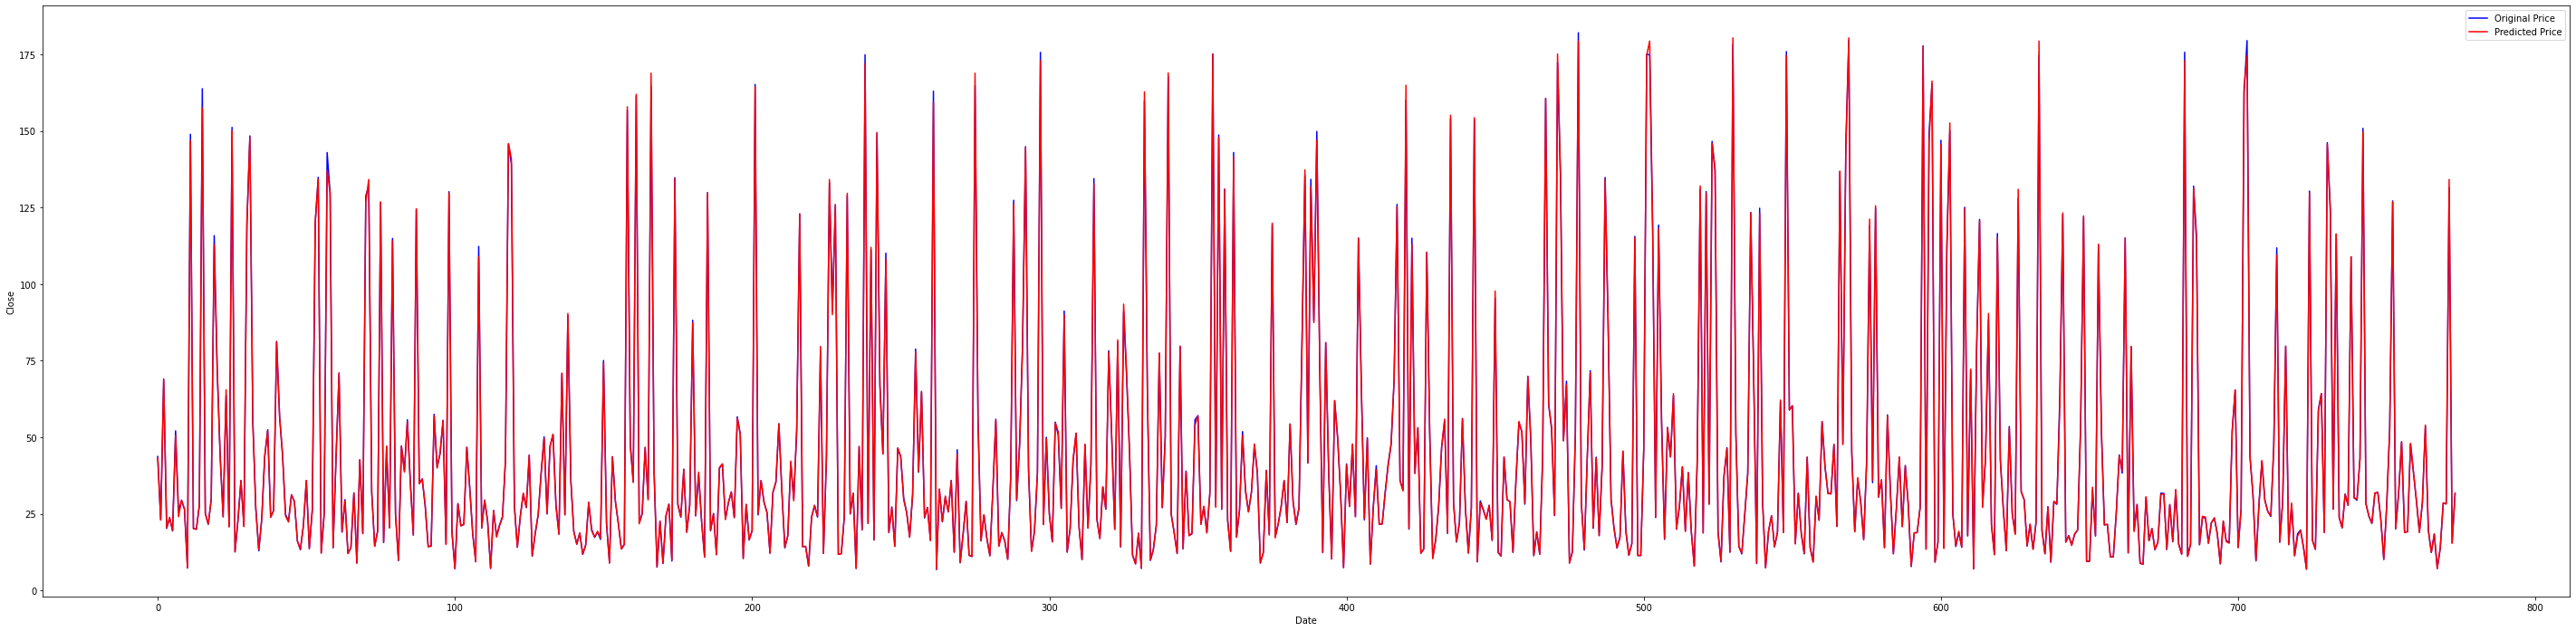

In [29]:
fig2 =plt.figure(figsize=(50,12))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test,y_pred)

0.9996281910407617

In [32]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(n_estimators=10, random_state=0)
regression.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [33]:
y_pred = regression.predict(x_test)

In [34]:
input_data = [[198.779999, 199.990005, 197.619995]]
input_data = sc.transform(input_data)
print(regression.predict(input_data))

[179.22199707]


In [35]:
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)

array([[ 43.51975021,  43.74250031],
       [ 23.10128574,  23.05607033],
       [ 68.57674866,  69.02500153],
       ...,
       [131.84400177, 131.3999939 ],
       [ 15.40085716,  15.56999969],
       [ 31.23850021,  31.59250069]])

In [36]:
import seaborn as sns

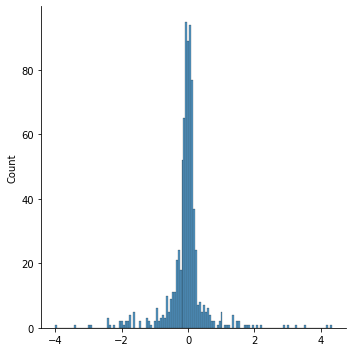

In [38]:
sns.displot(y_pred-y_test)
